In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#carregar dataset
df = pd.read_csv('train.csv')
df.head(5)
y = df.SalePrice              # O que queremos prever
X = df.drop(['SalePrice'], axis=1) # Os dados que usamos para prever

In [ ]:
#pré-processamento Básico
#o dataset tem colunas numéricas e categóricas

#identificar colunas numéricas e categóricas
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Criar transformadores para limpar os dados
# Numéricos: Preenche valores vazios com a média
numerical_transformer = SimpleImputer(strategy='mean')

# Categóricos: Preenche vazios com 'most_frequent' e transforma texto em números (OneHot)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
#random forest
model = RandomForestRegressor(n_estimators=100, random_state=0)

#pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

#dividir dados em treino e teste
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

#treinar o modelo
my_pipeline.fit(X_train, y_train)

#fazer previsões e Avaliar
preds = my_pipeline.predict(X_valid)

In [ ]:
# Avaliação usando MAE (mean absolute error)
score = mean_absolute_error(y_valid, preds)

print('--- Resultado ---')
print(f'Erro Médio Absoluto (MAE): ${score:,.2f}')
print("\nExemplo de previsão:")
print(f"Valor Real: ${y_valid.iloc[0]:.2f}")
print(f"Valor Previsto: ${preds[0]:.2f}")

--- Resultado ---
Erro Médio Absoluto (MAE): $17,711.25

Exemplo de previsão:
Valor Real: $200624.00
Valor Previsto: $215352.49


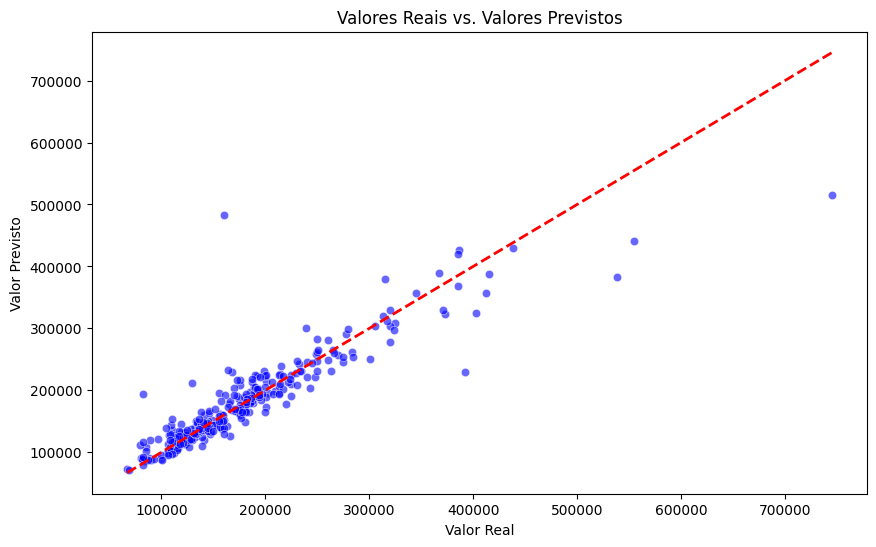

In [ ]:
#graficos

#valor real x valor previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=preds, color='blue', alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=2)
plt.title('Valores Reais vs. Valores Previstos')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.show()




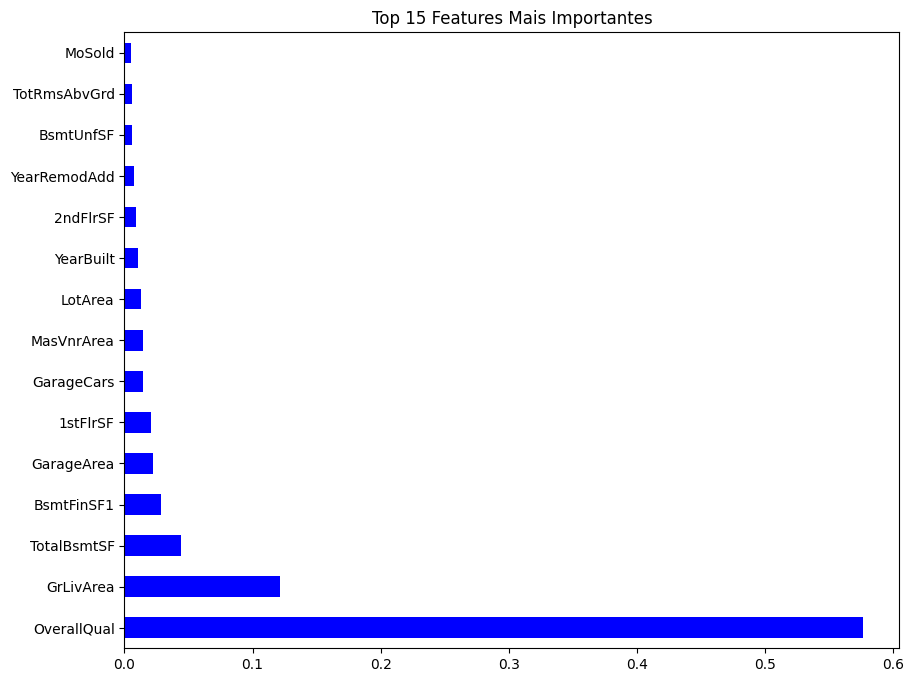

In [ ]:
#importância das features para predição de valores

#recuperar o modelo e os nomes das colunas do pipeline
model_rf = my_pipeline.named_steps['model']
preprocessor = my_pipeline.named_steps['preprocessor']

#nomes das colunas numéricas e categóricas transformadas
cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
feature_names = np.r_[numerical_cols, cat_names]

#criar dataframe de importâncias
importances = pd.Series(model_rf.feature_importances_, index=feature_names)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh', color='blue')
plt.title('Top 15 Features Mais Importantes')

plt.show()